# Import libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the dataset

Link: https://github.com/ShapeAI/PROJECTS-DATA-SCIENTIST-TRAINING/blob/main/Clustering%20Customer_segmentaion/Mall_Customers.csv

In [3]:
df=pd.read_csv("C:/Users/Hello/Documents/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

# If we have low amount of datapoints,
# how can we enlarge the present datapoints to train our model

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Conclusions

1. No Null Value
2. Gender has the dtype of object, which needs to be taken care of

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Conclusions

1. Avg. age of Customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

<AxesSubplot:xlabel='Age', ylabel='count'>

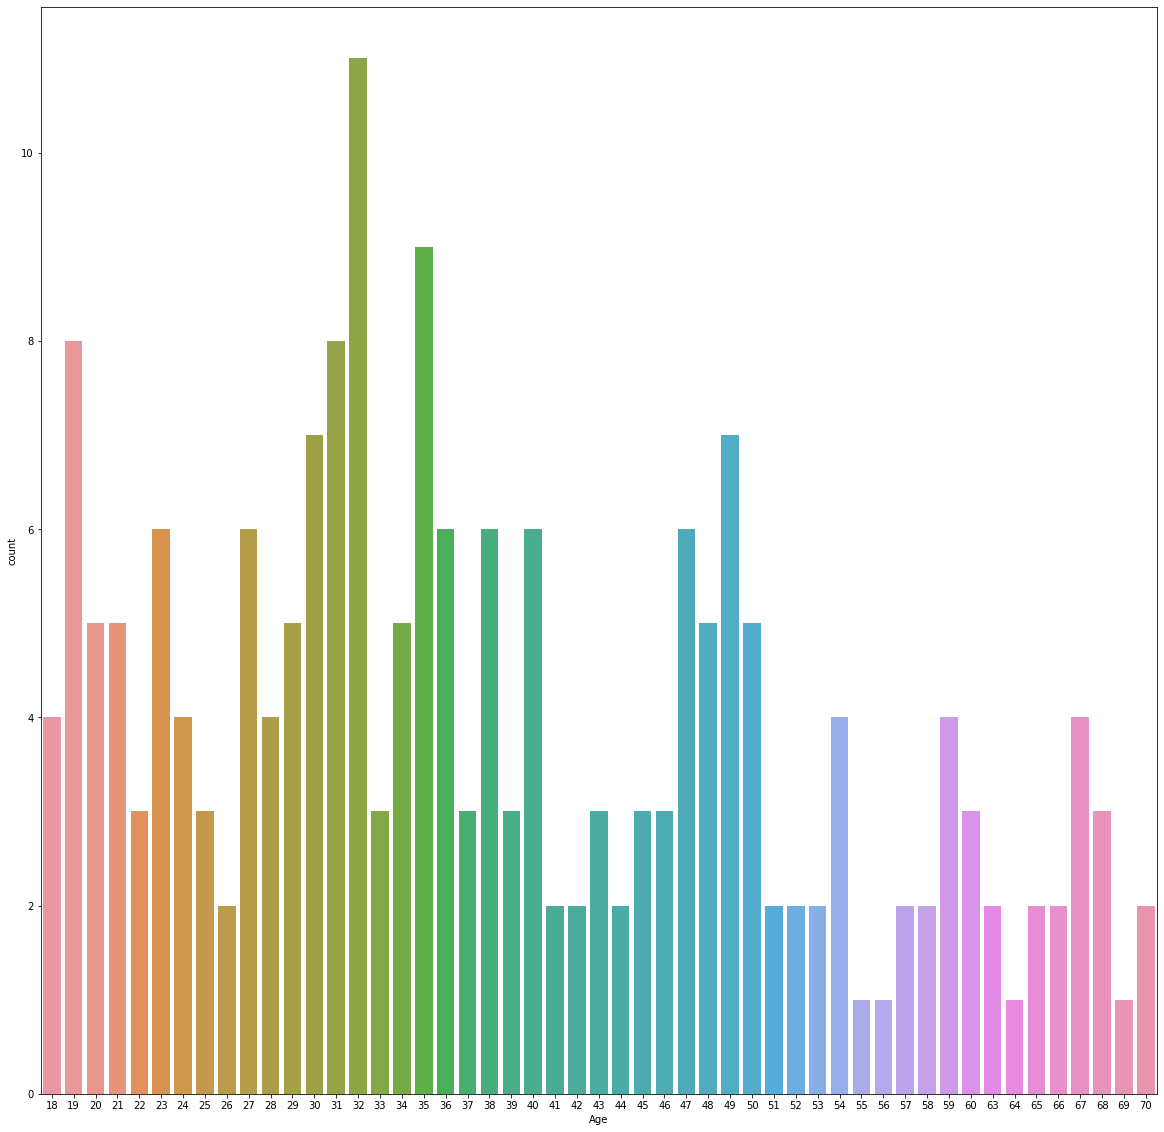

In [40]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Age')

In [15]:
df.Gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

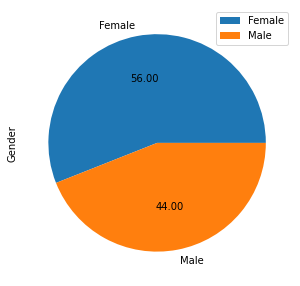

In [77]:
plt.figure(figsize=(5,5))
df.Gender.value_counts().plot(kind="pie",autopct="%.2f",fontsize=10)
plt.legend(fontsize="medium")

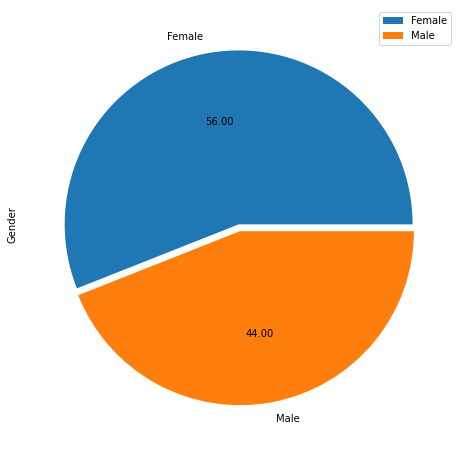

In [27]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot(kind="pie",autopct="%.2f",explode=(0,0.04))   #<- This autopct means Auto percentage which will show the percentage of the graph and also %.2f shows 2 digit after points
plt.legend()

* Conclusion

1. No. of females > No. of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

```
# This is formatted as code
```


In [40]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


Text(0.5, 1.0, 'Distribution of Income')

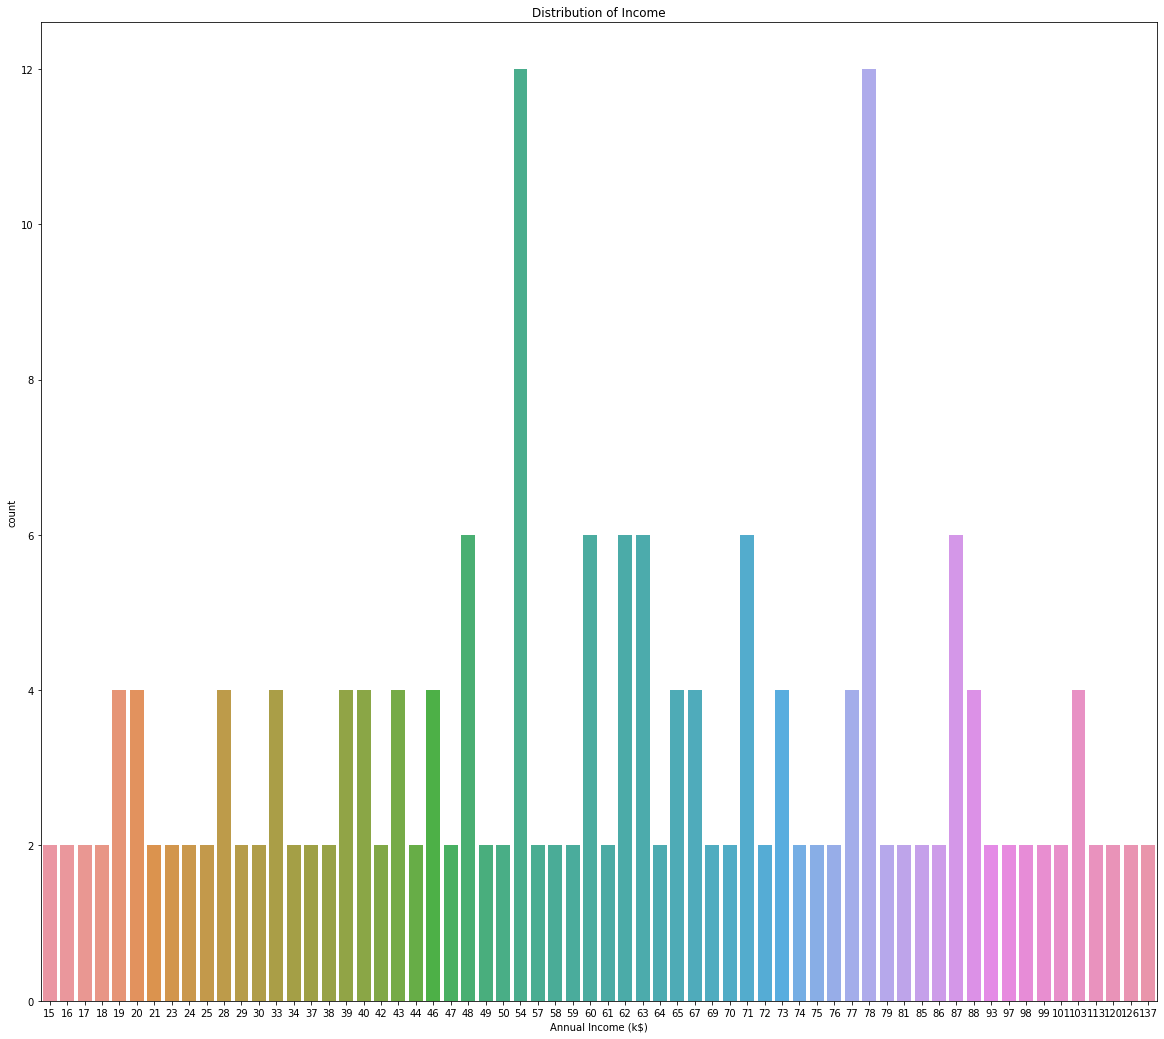

In [82]:
# plt.figure(figsize=(20,18))
# sns.countplot(data=df,x=df["Annual Income (k$)"])
# plt.title("Destribution of Income")

plt.figure(figsize=(20,18))
sns.countplot(data=df,x="Annual Income (k$)")
plt.title("Distribution of Income")

* Conclusions

1. The customers that are having the salary of $54(k) and $78(K), visits the mall most of time

Text(0.5, 1.0, 'Annual income w.r.t. to Gender')

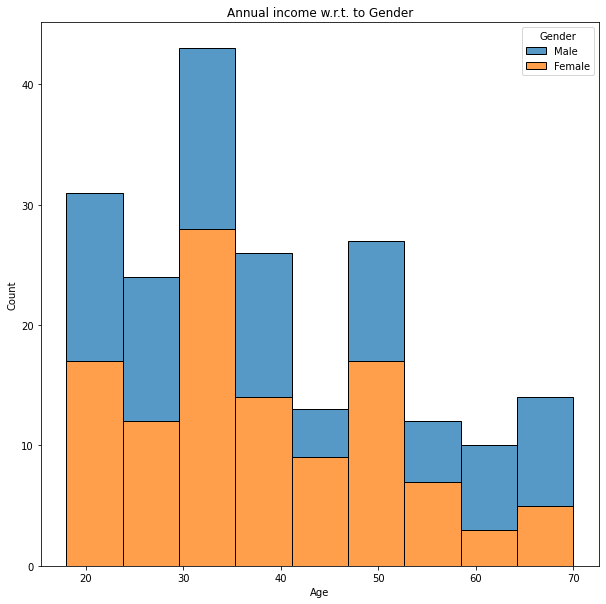

In [86]:
# Show the Annual Income Distribution w.r.t. to the Gender
# When You want to compare 2 features w.r.t to each other, use histplot for that

plt.figure(figsize=(10,10))
sns.histplot(df,x=df["Annual Income (k$)"],hue="Gender",multiple="stack")
plt.title("Annual Income Distribution w.r.t to Gender")
plt.grid()

# plt.figure(figsize=(10,10))
# sns.histplot(df,x=df["Age"],hue="Gender",multiple="stack")
# plt.title("Annual income w.r.t. to Gender")

# Seaborn lmplot

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


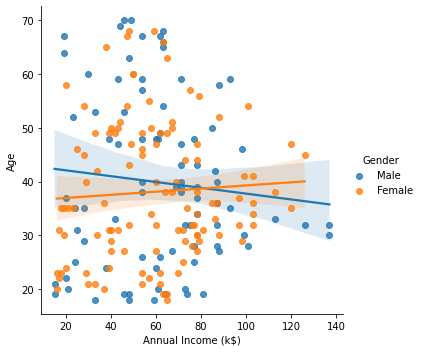

In [89]:
sns.lmplot(data=df,x="Annual Income (k$)",y="Age",hue="Gender")

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [94]:
enc=LabelEncoder()

In [95]:
df.Gender=enc.fit_transform(df.Gender)

In [96]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [97]:
df.drop("CustomerID",axis=1,inplace=True)

In [98]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [99]:
ssd=[]
for i in range(1,11):
    Kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    Kmodel.fit(df)
    ssd.append(Kmodel.inertia_)  #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.


In [100]:
ssd  #This ssd contains the distance between the points when k= 1,2,3,4,.......

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51130.690081263754,
 44389.80767355767,
 40891.680830865036,
 37295.808965663964]

Text(0.5, 1.0, 'Elbow Plot')

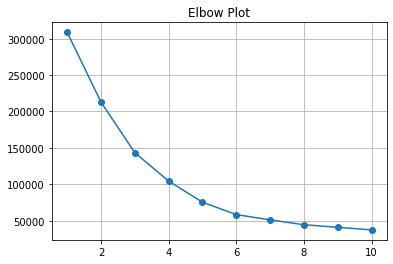

In [102]:
plt.plot(range(1,11),ssd,marker="o")
plt.grid()
plt.title("Elbow Plot")

In [ ]:
# After k=6 the curve is going to be some related to linear so that we will take k=6

In [103]:
Kmodel=KMeans(n_clusters=6)

In [104]:
# Kmodel.fit_predict(df)  #<- This fit_predict will do both things fit and predict both
# Kmodel.fit will only fit the model and after that you have to use Kmodel.predict for predict but in fit_predict, you can do everything at the same time
Kmodel.fit(df)

KMeans(n_clusters=6)

In [105]:
prediction = Kmodel.predict(df)

In [106]:
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 0,
       4, 3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 5, 0, 5, 2, 5, 2, 5, 2, 5,
       0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

In [134]:
Kmodel.cluster_centers_   #<- This model will give us all the centroids of the clusters

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

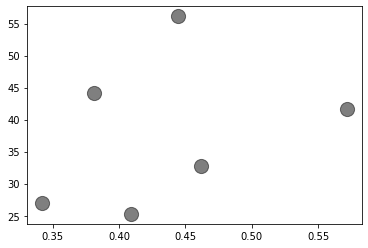

In [135]:
centers=Kmodel.cluster_centers_

In [108]:
len(Kmodel.cluster_centers_)

6

In [112]:
len(prediction)

200

In [114]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [113]:
prediction     #<- Here, the first array 3 tell us that the 1st row of dataframe will be at cluster 3. 2nd row will be at cluster 5 and so on........

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 2, 5, 2, 1,
       3, 5, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

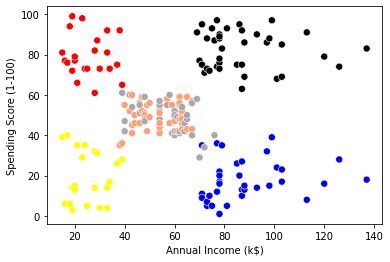

In [145]:
color = np.array(['darkgray', 'lightsalmon', 'blue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'],
                y = df['Spending Score (1-100)'],
                c=color[Kmodel.labels_],
                s=50)

## Hierarchical KMeans

In [117]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [118]:
var=linkage(df,method="ward")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

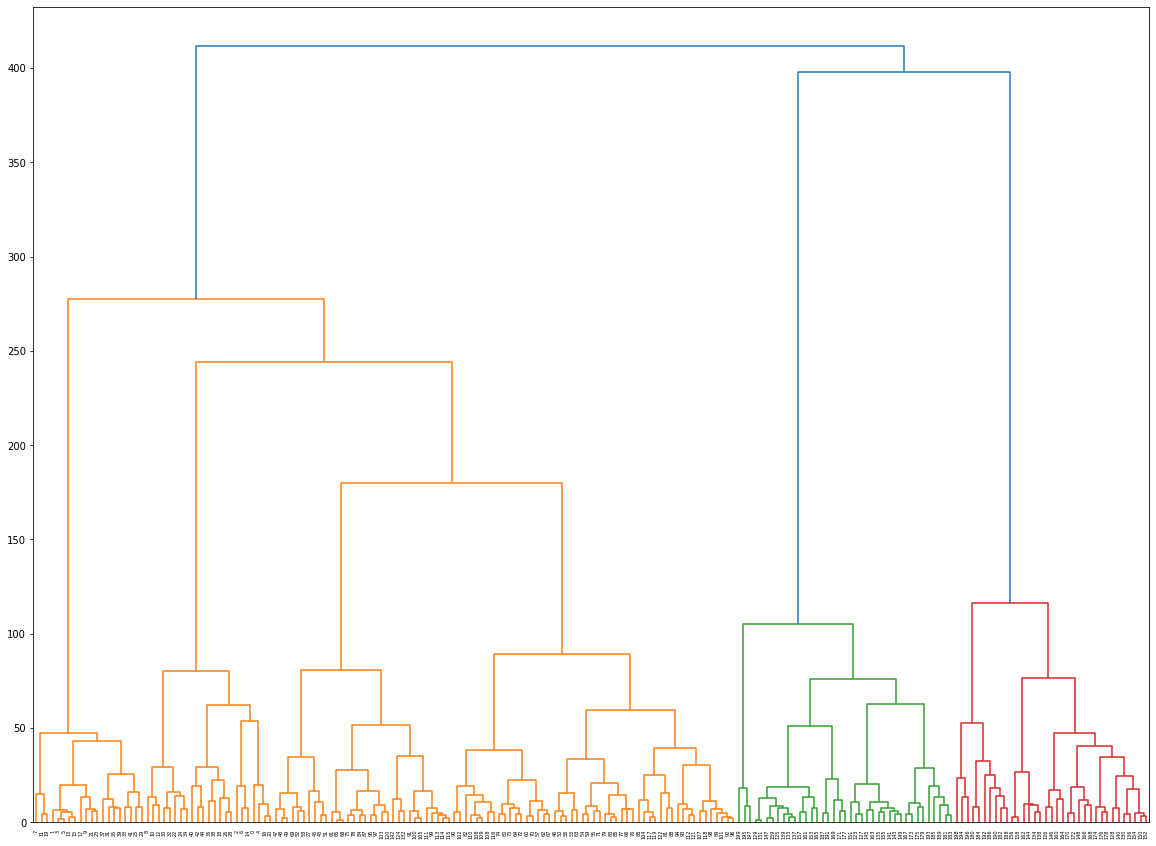

In [119]:
plt.figure(figsize=(20,15))
dendrogram(var,leaf_rotation=90)

In [146]:
%autosave 20

Autosaving every 20 seconds
